[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds4v/absa-vlsp-2018/blob/main/experiments/Hotel-v1.ipynb)

In [1]:
!pip install -q emoji
!pip install -q vncorenlp
!pip install -q datasets
!pip install -q accelerate
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 require

In [2]:
!git clone https://github.com/trunghieu41003/Big-data-project.git
!ls

Cloning into 'Big-data-project'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 49 (delta 10), reused 47 (delta 8), pack-reused 0
Receiving objects: 100% (49/49), 25.39 MiB | 9.62 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Big-data-project  sample_data


In [3]:
import os
import shutil

# Kiểm tra cấu trúc thư mục hiện tại
print("Trước khi di chuyển:")
!ls /content

# Đường dẫn thư mục hiện tại
current_folder = "/content/Big-data-project"

# Đường dẫn đích đến
destination_folder = "/content"

# Lặp qua từng thư mục con trong thư mục hiện tại
for item in os.listdir(current_folder):
    # Tạo đường dẫn đầy đủ tới mỗi thư mục con
    current_path = os.path.join(current_folder, item)
    # Di chuyển thư mục con đến đích đến
    shutil.move(current_path, destination_folder)

# Kiểm tra lại cấu trúc thư mục sau khi di chuyển
print("\nSau khi di chuyển:")
!ls /content

Trước khi di chuyển:
Big-data-project  sample_data

Sau khi di chuyển:
acsa_model.py  Big-data-project  evaluators   helper.py  processors  sample_data
assests        datasets		 experiments  Paper.pdf  README.md


In [4]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
sys.path.append('..')
tf.__version__

'2.15.0'

# Constants Setup and Load the Data

In [5]:
TRAIN_PATH = 'datasets/vlsp2018_hotel/1-VLSP2018-SA-Hotel-train.csv'
VAL_PATH = 'datasets/vlsp2018_hotel/2-VLSP2018-SA-Hotel-dev.csv'
TEST_PATH = 'datasets/vlsp2018_hotel/3-VLSP2018-SA-Hotel-test.csv'
PRETRAINED_MODEL = 'vinai/phobert-base'
MODEL_NAME = 'Hotel-v1' # Multitask model on Hotel domain
MAX_LENGTH = 256
BATCH_SIZE = 25
EPOCHS = 20

In [6]:
from processors.vlsp2018_processor import VLSP2018Loader
raw_datasets = VLSP2018Loader.load(TRAIN_PATH, VAL_PATH, TEST_PATH)
raw_datasets

Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Review', 'FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES', 'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES', 'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES', 'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS', 'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL', 'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY', 'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT', 'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS', 'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS', 'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES', 'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS', 'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENERAL'],
        num_rows: 3000
    })
    val: Dataset({
        features: ['Review', 'FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATUR

# Preprocess and Tokenize the Data

In [7]:
from processors.vietnamese_processor import VietnameseTextPreprocessor

# You should be carefull when using single word replacement for acronyms, because it can cause misinterpretation.
# For example, 'giá': ['price', 'gia'] can replace the word 'gia' in 'gia đình', making it become 'giá đình'.
vn_preprocessor = VietnameseTextPreprocessor(vncorenlp_dir='../processors/VnCoreNLP', extra_teencodes={
    'khách sạn': ['ks'], 'nhà hàng': ['nhahang'], 'nhân viên': ['nv'],
    'cửa hàng': ['store', 'sop', 'shopE', 'shop'],
    'sản phẩm': ['sp', 'product'], 'hàng': ['hàg'],
    'giao hàng': ['ship', 'delivery', 'síp'], 'đặt hàng': ['order'],
    'chuẩn chính hãng': ['authentic', 'aut', 'auth'], 'hạn sử dụng': ['date', 'hsd'],
    'điện thoại': ['dt'],  'facebook': ['fb', 'face'],
    'nhắn tin': ['nt', 'ib'], 'trả lời': ['tl', 'trl', 'rep'],
    'feedback': ['fback', 'fedback'], 'sử dụng': ['sd'], 'xài': ['sài'],
}, max_correction_length=MAX_LENGTH)

VnCoreNLP word segmenter is loaded successfully.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/961 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

dict.txt:   0%|          | 0.00/360k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

bmd1905/vietnamese-correction-v2 is loaded successfully.


In [8]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL)
tokens = tokenizer.encode('Tôi là sinh_viên trường đại_học Công_nghệ thông_tin .')
print('Encode:', tokens, '\nDecode:', tokenizer.decode(tokens))
tokenizer.model_input_names

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Encode: [0, 218, 8, 649, 212, 956, 2413, 195, 5, 2] 
Decode: <s> Tôi là sinh_viên trường đại_học Công_nghệ thông_tin. </s>


['input_ids', 'token_type_ids', 'attention_mask']

In [9]:
# preprocessed_datasets = VLSP2018Loader.preprocess_and_tokenize(raw_datasets, vn_preprocessor, tokenizer, BATCH_SIZE * 2, MAX_LENGTH)
# preprocessed_datasets.save_to_disk('../datasets/preprocessed_hotel')
# display(preprocessed_datasets)
# pd.DataFrame({
#     'raw_datasets': raw_datasets['train']['Review'][1480:1490],
#     'encoded_input_ids': preprocessed_datasets['train']['input_ids'][1480:1490],
#     'decoded_input_ids': [tokenizer.decode(preprocessed_datasets['train'][i]['input_ids']) for i in range(1480, 1490)]
# })

# Extra Step for ACSA-v1 Solution

In [10]:
from datasets import load_from_disk
preprocessed_datasets = load_from_disk('datasets/preprocessed_hotel')
preprocessed_datasets = VLSP2018Loader.labels_to_flatten_onehot(preprocessed_datasets)
preprocessed_datasets

[INFO] Transforming "Aspect#Categoy,Polarity" labels to flattened one-hot encoding...


/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Map (num_proc=8):   0%|          | 0/3000 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/2000 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/600 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['FlattenOneHotLabels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3000
    })
    val: Dataset({
        features: ['FlattenOneHotLabels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['FlattenOneHotLabels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 600
    })
})

In [11]:
print('Aspect#Category,Polarity in One-hot form of the first review:')
example_onehot = preprocessed_datasets['train'][0]['FlattenOneHotLabels']
np.array(example_onehot).reshape(-1, 4)

Aspect#Category,Polarity in One-hot form of the first review:


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

# Prepare for TensorFlow Training

In [12]:
ASPECT_CATEGORY_NAMES = raw_datasets['train'].column_names[1:]
steps_per_epoch = len(preprocessed_datasets['train']) // BATCH_SIZE
total_steps = EPOCHS * steps_per_epoch
print(ASPECT_CATEGORY_NAMES)

['FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES', 'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES', 'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES', 'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS', 'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL', 'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY', 'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT', 'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS', 'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS', 'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES', 'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS', 'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENERAL']


In [13]:
train_tf_dataset = preprocessed_datasets['train'].to_tf_dataset(
    columns=tokenizer.model_input_names, label_cols='FlattenOneHotLabels',
    batch_size=BATCH_SIZE, shuffle=True, num_workers=8
)
val_tf_dataset = preprocessed_datasets['val'].to_tf_dataset(
    columns=tokenizer.model_input_names, label_cols='FlattenOneHotLabels',
    batch_size=BATCH_SIZE, shuffle=False, num_workers=8
)
test_tf_dataset = preprocessed_datasets['test'].to_tf_dataset(
    columns=tokenizer.model_input_names, label_cols='FlattenOneHotLabels',
    batch_size=BATCH_SIZE, shuffle=False, num_workers=8
)

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.callbacks import EarlyStopping

optimizer = Adam(learning_rate=CosineDecay(
    initial_learning_rate = 1e-4,
    warmup_target = 2e-4,
    warmup_steps = int(total_steps * 0.15), # 15% of total_steps
    decay_steps = int(total_steps * 0.3), # Next 30% of total_steps
    alpha = 0.1, # Minimum lr for decay as a fraction of initial_learning_rate
))

early_stop_callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 3, # Stop if no improvement after 3 epochs
    restore_best_weights = True, # Restore weights from the epoch with the best value
    verbose = 1
)

# Fine-tuning with TensorFlow

tf_model.h5:   0%|          | 0.00/740M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/20


120/120 [==============================] - 315s 2s/step - loss: 0.1865 - val_loss: 0.1305
Epoch 2/20
120/120 [==============================] - 225s 2s/step - loss: 0.1277 - val_loss: 0.0951
Epoch 3/20
120/120 [==============================] - 224s 2s/step - loss: 0.0936 - val_loss: 0.0785
Epoch 4/20
120/120 [==============================] - 248s 2s/step - loss: 0.0664 - val_loss: 0.0748
Epoch 5/20
120/120 [==============================] - 229s 2s/step - loss: 0.0452 - val_loss: 0.0747
Epoch 6/20
120/120 [==============================] - 247s 2s/step - loss: 0.0263 - val_loss: 0.0713
Epoch 7/20
120/120 [==============================] - 223s 2s/step - loss: 0.0137 - val_loss: 0.0715
Epoch 8/20
120/120 [==============================] - 248s 2s/step - loss: 0.0078 - val_loss: 0.0724
Epoch 9/20
120/120 [==============================] - 227s 2s/step - loss: 0.0058 - val_loss: 0.0729
Epoch 9: early stopping


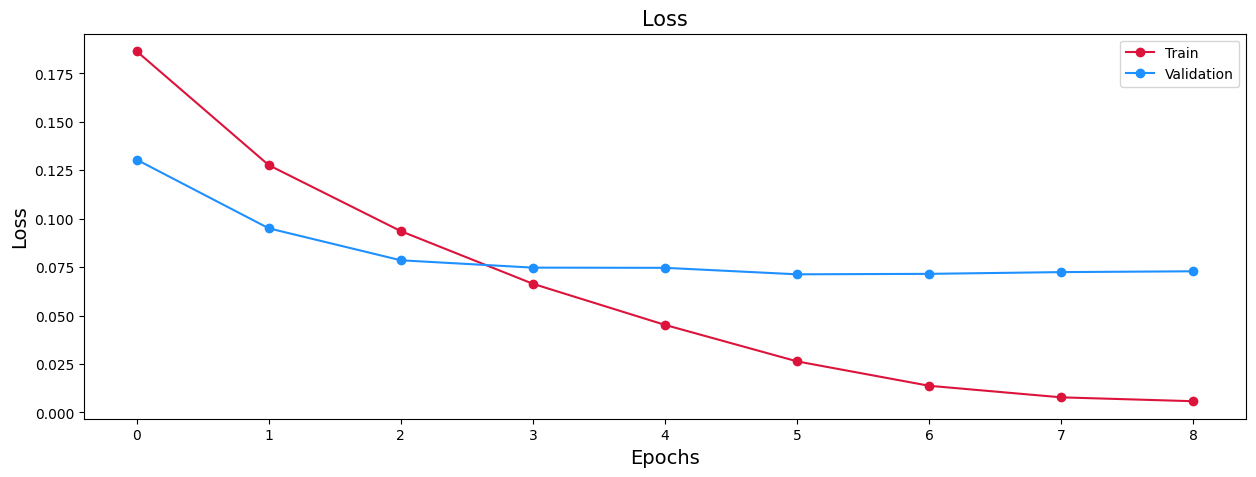

CPU times: user 14min 1s, sys: 3min 39s, total: 17min 41s
Wall time: 39min 38s


In [15]:
%%time
from acsa_model import VLSP2018MultiTask
from helper import plot_training_history
model = VLSP2018MultiTask(PRETRAINED_MODEL, ASPECT_CATEGORY_NAMES, optimizer, name=MODEL_NAME)

history = model.fit(
    train_tf_dataset,
    validation_data = val_tf_dataset,
    callbacks = [early_stop_callback],
    epochs = EPOCHS,
    verbose = 1
).history

model.save_weights(f'./weights/{MODEL_NAME}/{MODEL_NAME}', save_format='tf')
plot_training_history(history)

In [16]:
from google.colab import drive # Move weights to Drive for faster downloading
drive.mount('/content/GoogleDrive', force_remount=True)
!zip -r ./weights/{MODEL_NAME}.zip ./weights/{MODEL_NAME}
!mv ./weights/{MODEL_NAME}.zip /content/GoogleDrive/My\ Drive

Mounted at /content/GoogleDrive
  adding: weights/Hotel-v1/ (stored 0%)
  adding: weights/Hotel-v1/Hotel-v1.index (deflated 80%)
  adding: weights/Hotel-v1/checkpoint (deflated 37%)
  adding: weights/Hotel-v1/Hotel-v1.data-00000-of-00001 (deflated 32%)


# Predict on the Test Data

In [17]:
from acsa_model import VLSP2018MultiTask
reloaded_model = VLSP2018MultiTask(PRETRAINED_MODEL, ASPECT_CATEGORY_NAMES, optimizer, name=MODEL_NAME)
reloaded_model.load_weights(f'./weights/{MODEL_NAME}/{MODEL_NAME}') # Reload the Model
reloaded_model.evaluate(val_tf_dataset, batch_size=BATCH_SIZE, verbose=1)

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


80/80 [==============================] - 85s 420ms/step - loss: 0.0713


0.07130342721939087

In [18]:
y_pred = reloaded_model.acsa_predict(test_tf_dataset, BATCH_SIZE) # On test set
reloaded_model.evaluate(test_tf_dataset, batch_size=BATCH_SIZE, verbose=1)
print('Example:', raw_datasets['test'][0]['Review'])
reloaded_model.print_acsa_pred(y_pred[0])

24/24 [==============================] - 34s 413ms/step - loss: 0.0839
Example: Ga giường không sạch, nhân viên quên dọn phòng một ngày.
=> ROOMS#CLEANLINESS,negative
=> ROOM_AMENITIES#CLEANLINESS,negative
=> ROOM_AMENITIES#DESIGN&FEATURES,negative
=> SERVICE#GENERAL,negative


In [19]:
from tensorflow.data import Dataset # On a random review by user
random_input = VLSP2018Loader.preprocess_and_tokenize(
    input('Enter your review: '), vn_preprocessor, tokenizer,
    batch_size=1, max_length=MAX_LENGTH
)
tf_inputs = Dataset.from_tensor_slices({x: [[random_input[x][0]]] for x in tokenizer.model_input_names})
random_pred = reloaded_model.acsa_predict(tf_inputs)
reloaded_model.print_acsa_pred(random_pred[0])

Enter your review: đồ ăn ngon nhưng phục vụ quá tệ, được cái quán ăn sạch sẽ thơm tho
[INFO] Preprocessing and tokenizing text data...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


1/1 [==============================] - 7s 7s/step
=> FOOD&DRINKS#QUALITY,positive
=> HOTEL#CLEANLINESS,positive
=> SERVICE#GENERAL,neutral


# SkLearn Evaluation

In [20]:
from helper import argmax_label_matrix
y_test = argmax_label_matrix(preprocessed_datasets['test']['FlattenOneHotLabels'])
y_test

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
from evaluators.sklearn_evaluator import VLSP2018SklearnEvaluator
sk_eval = VLSP2018SklearnEvaluator(y_test, y_pred, ASPECT_CATEGORY_NAMES)
# sk_eval.report(report_type='Aspect#Category,Polarity').round(3)
# sk_eval.report(report_type='Aspect#Category').round(3)
# sk_eval.report(report_type='Polarity').round(3)
# sk_eval.report(report_type='macro_avg').round(3)
sk_eval.report(report_type='all')

100%|██████████| 37/37 [00:00<00:00, 25018.42it/s]


ACSA Report (w/o "None" polarity) 
 Aspect#Category 
 Aspect#Category,Polarity 
 
 
 precision recall f1-score support precision recall f1-score support 
 
 
 
 FACILITIES#CLEANLINESS,positive 
 1.000 0.400 0.571 5 
 1.000 0.000 0.000 2 
 
 
 
 FACILITIES#CLEANLINESS,negative 
 
 1.000 0.667 0.800 3 
 
 
 
 FACILITIES#COMFORT,positive 
 0.400 0.077 0.129 26 
 0.333 0.050 0.087 20 
 
 
 
 FACILITIES#COMFORT,negative 
 
 0.000 0.000 0.000 6 
 
 
 
 FACILITIES#DESIGN&FEATURES,neutral 
 0.769 0.462 0.577 65 
 1.000 0.000 0.000 5 
 
 
 
 FACILITIES#DESIGN&FEATURES,positive 
 
 0.625 0.263 0.370 38 
 
 
 
 FACILITIES#DESIGN&FEATURES,negative 
 
 0.522 0.545 0.533 22 
 
 
 
 FACILITIES#GENERAL,neutral 
 0.632 0.571 0.600 21 
 1.000 0.000 0.000 1 
 
 
 
 FACILITIES#GENERAL,positive 
 
 0.526 0.526 0.526 19 
 
 
 
 FACILITIES#GENERAL,negative 
 
 1.000 0.000 0.000 1 
 
 
 
 FACILITIES#MISCELLANEOUS,positive 
 1.000 0.000 0.000 8 
 1.000 0.000 0.000 3 
 
 
 
 FACILITIES#MISCELLANEOUS,negative 
 
 1.000 0.000 0.000 5 
 
 
 
 FACILITIES#PRICES,neutral 
 0.667 0.154 0.250 13 
 1.000 0.000 0.000 2 
 
 
 
 FACILITIES#PRICES,positive 
 
 1.000 0.250 0.400 8 
 
 
 
 FACILITIES#PRICES,negative 
 
 0.000 0.000 0.000 3 
 
 
 
 FACILITIES#QUALITY,neutral 
 0.886 0.608 0.721 51 
 1.000 0.000 0.000 2 
 
 
 
 FACILITIES#QUALITY,positive 
 
 0.714 0.417 0.526 24 
 
 
 
 FACILITIES#QUALITY,negative 
 
 0.810 0.680 0.739 25 
 
 
 
 FOOD&DRINKS#MISCELLANEOUS,positive 
 1.000 0.000 0.000 3 
 1.000 0.000 0.000 1 
 
 
 
 FOOD&DRINKS#MISCELLANEOUS,negative 
 
 1.000 0.000 0.000 2 
 
 
 
 FOOD&DRINKS#PRICES,positive 
 1.000 0.111 0.200 9 
 1.000 0.167 0.286 6 
 
 
 
 FOOD&DRINKS#PRICES,negative 
 
 1.000 0.000 0.000 3 
 
 
 
 FOOD&DRINKS#QUALITY,neutral 
 0.958 0.891 0.924 129 
 0.800 0.286 0.421 14 
 
 
 
 FOOD&DRINKS#QUALITY,positive 
 
 0.900 0.938 0.918 96 
 
 
 
 FOOD&DRINKS#QUALITY,negative 
 
 0.867 0.684 0.765 19 
 
 
 
 FOOD&DRINKS#STYLE&OPTIONS,neutral 
 0.943 0.798 0.865 124 
 1.000 0.000 0.000 6 
 
 
 
 FOOD&DRINKS#STYLE&OPTIONS,positive 
 
 0.914 0.744 0.821 43 
 
 
 
 FOOD&DRINKS#STYLE&OPTIONS,negative 
 
 0.871 0.813 0.841 75 
 
 
 
 HOTEL#CLEANLINESS,positive 
 0.867 0.776 0.819 67 
 0.864 0.864 0.864 59 
 
 
 
 HOTEL#CLEANLINESS,negative 
 
 1.000 0.125 0.222 8 
 
 
 
 HOTEL#COMFORT,neutral 
 0.806 0.574 0.671 94 
 1.000 0.000 0.000 1 
 
 
 
 HOTEL#COMFORT,positive 
 
 0.820 0.625 0.709 80 
 
 
 
 HOTEL#COMFORT,negative 
 
 0.167 0.077 0.105 13 
 
 
 
 HOTEL#DESIGN&FEATURES,neutral 
 0.798 0.788 0.793 85 
 0.000 0.000 0.000 3 
 
 
 
 HOTEL#DESIGN&FEATURES,positive 
 
 0.795 0.838 0.816 74 
 
 
 
 HOTEL#DESIGN&FEATURES,negative 
 
 0.250 0.125 0.167 8 
 
 
 
 HOTEL#GENERAL,neutral 
 0.865 0.762 0.810 151 
 1.000 0.000 0.000 4 
 
 
 
 HOTEL#GENERAL,positive 
 
 0.849 0.793 0.820 135 
 
 
 
 HOTEL#GENERAL,negative 
 
 0.714 0.417 0.526 12 
 
 
 
 HOTEL#MISCELLANEOUS,neutral 
 0.800 0.118 0.205 68 
 1.000 0.000 0.000 5 
 
 
 
 HOTEL#MISCELLANEOUS,positive 
 
 1.000 0.000 0.000 29 
 
 
 
 HOTEL#MISCELLANEOUS,negative 
 
 0.800 0.235 0.364 34 
 
 
 
 HOTEL#PRICES,neutral 
 0.789 0.845 0.816 71 
 1.000 0.000 0.000 2 
 
 
 
 HOTEL#PRICES,positive 
 
 0.818 0.857 0.837 63 
 
 
 
 HOTEL#PRICES,negative 
 
 0.300 0.500 0.375 6 
 
 
 
 HOTEL#QUALITY,neutral 
 0.571 0.308 0.400 13 
 1.000 0.000 0.000 1 
 
 
 
 HOTEL#QUALITY,positive 
 
 0.400 0.286 0.333 7 
 
 
 
 HOTEL#QUALITY,negative 
 
 0.500 0.200 0.286 5 
 
 
 
 LOCATION#GENERAL,neutral 
 0.981 0.914 0.946 221 
 1.000 0.000 0.000 15 
 
 
 
 LOCATION#GENERAL,positive 
 
 0.932 0.932 0.932 190 
 
 
 
 LOCATION#GENERAL,negative 
 
 0.688 0.688 0.688 16 
 
 
 
 ROOMS#CLEANLINESS,neutral 
 0.915 0.910 0.912 200 
 1.000 0.000 0.000 7 
 
 
 
 ROOMS#CLEANLINESS,positive 
 
 0.892 0.946 0.918 166 
 
 
 
 ROOMS#CLEANLINESS,negative 
 
 0.696 0.593 0.640 27 
 
 
 
 ROOMS#COMFORT,neutral 
 0.758 0.742 0.750 93 
 1.000 0.000 0.000 2 
 
 
 
 ROOMS#COMFORT,positive 
 
 0.754 0.867 0.806 60 
 
 
 
 ROOMS#COMFORT,ne